In [1]:
import itertools

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [3]:
df1 = pd.read_csv("../data/heartbeat/ptbdb_normal.csv", header=None)
df2 = pd.read_csv("../data/heartbeat/ptbdb_abnormal.csv", header=None)

df = pd.concat([df1, df2])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337, stratify=df[187])


In [35]:
# print(df_train.head(10))
# print(df_train.describe())

print(df1.head(10))
print(df1.describe())

print(df2.head(10))
print(df2.describe())

        0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
5  0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   
6  1.000000  0.487680  0.114305  0.000000  0.030116  0.065024  0.060917   
7  1.000000  0.460381  0.122178  0.009296  0.125719  0.220009  0.267375   
8  1.000000  0.755102  0.135116  0.000000  0.285714  0.331457  0.256861   
9  1.000000  0.706176  0.323144  0.101684  0.013724  0.222707  0.285714   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0

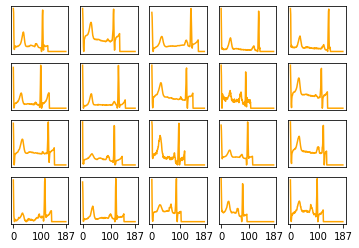

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=5)

for i, ax in enumerate(fig.axes):
    df1.iloc[i,0:187].plot(ax=ax, color='orange')
    ax.set_xticks([])
    ax.set_yticks([])
# for i in [0, 5, 10, 15]:
#     fig.axes[i].set_yticks([0, 0.5, 1])
for i in [15, 16, 17, 18, 19]:
    fig.axes[i].set_xticks([0, 100, 187])    
plt.savefig('ptbdb_samples1.svg')
plt.show()


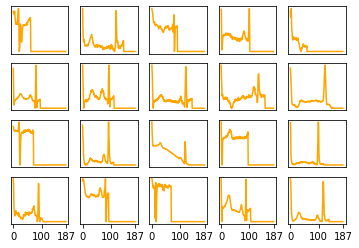

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=5)

for i, ax in enumerate(fig.axes):
    df2.iloc[i,0:187].plot(ax=ax, color='orange')
    ax.set_xticks([])
    ax.set_yticks([])
# for i in [0, 5, 10, 15]:
#     fig.axes[i].set_yticks([0, 0.5, 1])
for i in [15, 16, 17, 18, 19]:
    fig.axes[i].set_xticks([0, 100, 187])    
plt.savefig('ptbdb_samples2.svg')
plt.show()


In [36]:
Y = df_train[187]
X = df_train.iloc[:, :187]

In [37]:
pca = PCA().fit(X)
evr = np.cumsum(pca.explained_variance_ratio_)
cut = evr[evr>=0.99][0]
cut_index = np.where(evr == cut)

In [38]:
n_components = cut_index[0].item()#.item()
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
X_ipca = ipca.fit_transform(X)


In [39]:
km = KMeans(n_clusters=2)
y_pred_km = km.fit_predict(X=X_ipca)

In [40]:
gmm = GaussianMixture(n_components=2, covariance_type='full',
                              max_iter=100).fit(X_ipca)
y_pred_gm = gmm.predict(X_ipca)

/home/nik/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


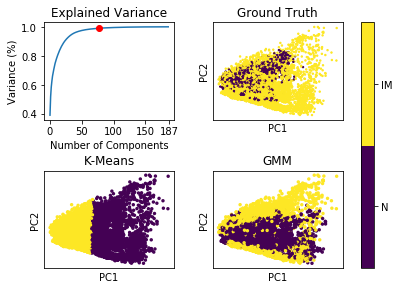

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(h_pad=3.0)

###%% Explained Variance
axes[0,0].plot(evr)
axes[0,0].plot(cut_index, cut, 'ro')
axes[0,0].set_xticks([0, 50, 100, 150, 187])
axes[0,0].set_xlabel('Number of Components')
axes[0,0].set_ylabel('Variance (%)') #for each component
axes[0,0].set_title("Explained Variance")

###%% Ground Truth
# colors = ['navy', 'turquoise', 'darkorange', 'green', 'red']
# colors = ['#440154', '#3B528B', '#21918B', '#5EC962', '#FDE725']
colors = ['#440154', '#FDE725']

c1 = axes[0,1].scatter(X_ipca[:, 0], X_ipca[:, 1], c=Y, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[0,1].set_xlabel("PC1")
axes[0,1].set_ylabel("PC2")
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_title("Ground Truth")
cb = fig.colorbar(c1, ax=axes)
cb.set_ticks([0.25, 0.75])
cb.set_ticklabels(['N', 'IM'])

##%% KMeans Classifier
axes[1,0].scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred_km, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[1,0].set_xlabel("PC1")
axes[1,0].set_ylabel("PC2")
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_title("K-Means")

##%% Gaussian Mixture Model
axes[1,1].scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred_gm, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[1,1].set_xlabel("PC1")
axes[1,1].set_ylabel("PC2")
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_title("GMM")

plt.savefig('ptbdb_clustering.png', dpi=600)
plt.show()